<a href="https://colab.research.google.com/github/Alexandra-SR/PI_2/blob/master/prueba2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 117kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=caafb4ca0c1eb8d3639b4d94c560ee76a18d2d8723cadd670e6655129996c942
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [5]:
!mkdir known
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/2/2d/Bill_Gates_2014.jpg/454px-Bill_Gates_2014.jpg -O known/bill.jpg
!wget https://i.pinimg.com/736x/39/ab/f5/39abf539e80f88a1bc53781946743e36.jpg -O known/sara.jpg
!wget https://tentulogo.com/wp-content/uploads/Mark-Zuckerberg.jpg -O known/mark.jpg

--2020-09-21 03:15:31--  https://upload.wikimedia.org/wikipedia/commons/thumb/2/2d/Bill_Gates_2014.jpg/454px-Bill_Gates_2014.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56604 (55K) [image/jpeg]
Saving to: ‘known/bill.jpg’

known/bill.jpg      100%[===================>]  55.28K  --.-KB/s    in 0.03s   

2020-09-21 03:15:31 (1.62 MB/s) - ‘known/bill.jpg’ saved [56604/56604]

--2020-09-21 03:15:31--  https://i.pinimg.com/736x/39/ab/f5/39abf539e80f88a1bc53781946743e36.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.36.248.234, 2600:1409:6800:180::1931, 2600:1409:6800:18e::1931, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.36.248.234|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96521 (94K) [image/jpeg]
Saving to: ‘known/sara.jpg’

known/sara.jpg      100%[=======

In [21]:
!mkdir unknown
!wget https://cnet3.cbsistatic.com/img/oL_IyDK6LMHlH4HBH8hyNqmAh6s=/940x0/2019/02/28/38e55267-ea0d-4e3d-bd39-56e6fab0c220/20160222-facebook-ceo-mark-zuckerberg-01.jpg -O unknown/1.jpg
!wget https://www.irishtimes.com/polopoly_fs/1.4122962.1576969156!/image/image.jpg_gen/derivatives/box_1200_630/image.jpg -O unknown/2.jpg
!wget https://www.biografiasyvidas.com/biografia/g/fotos/gates_bill_1.jpg -O unknown/3.jpg
!wget https://www.biography.com/.image/t_share/MTY2MzU3OTcxMTUwODQxNTM1/steve-jobs--david-paul-morrisbloomberg-via-getty-images.jpg -O unknown/4.jpg
!wget https://cdn.ticbeat.com/src/uploads/2016/12/Bill_Gates-810x540.jpg -O unknown/5.jpg
!wget https://e00-telva.uecdn.es/assets/multimedia/imagenes/2020/04/12/15866787966771.jpg -O unknown/6.jpg
!wget https://www.elimparcial.es/galerias-noticias/galerias/4138/medium/saorise2.jpg -O unknown/7.jpg

mkdir: cannot create directory ‘unknown’: File exists
--2020-09-21 03:37:12--  https://cnet3.cbsistatic.com/img/oL_IyDK6LMHlH4HBH8hyNqmAh6s=/940x0/2019/02/28/38e55267-ea0d-4e3d-bd39-56e6fab0c220/20160222-facebook-ceo-mark-zuckerberg-01.jpg
Resolving cnet3.cbsistatic.com (cnet3.cbsistatic.com)... 151.101.53.188, 2a04:4e42:d::444
Connecting to cnet3.cbsistatic.com (cnet3.cbsistatic.com)|151.101.53.188|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51573 (50K) [image/jpeg]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg       100%[===================>]  50.36K  --.-KB/s    in 0.01s   

2020-09-21 03:37:12 (4.54 MB/s) - ‘unknown/1.jpg’ saved [51573/51573]

--2020-09-21 03:37:12--  https://www.irishtimes.com/polopoly_fs/1.4122962.1576969156!/image/image.jpg_gen/derivatives/box_1200_630/image.jpg
Resolving www.irishtimes.com (www.irishtimes.com)... 151.101.2.174, 151.101.66.174, 151.101.130.174, ...
Connecting to www.irishtimes.com (www.irishtimes.com)|151.101.2.174|:443

Processing 7.jpg
[0.85762453 0.55143367 0.80083375]


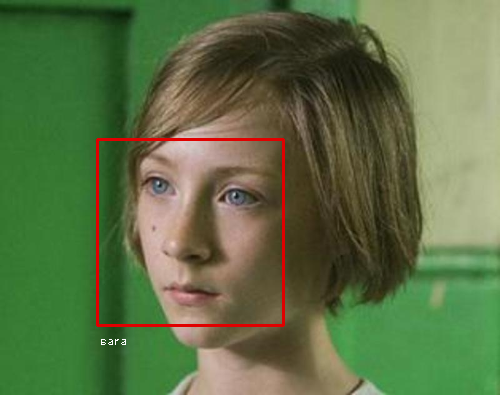

Processing 5.jpg
[0.51031812 0.77378428 0.67353764]


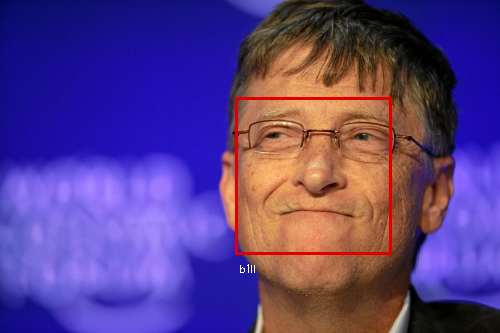

Processing 3.jpg
[0.50736949 0.85523521 0.72636333]


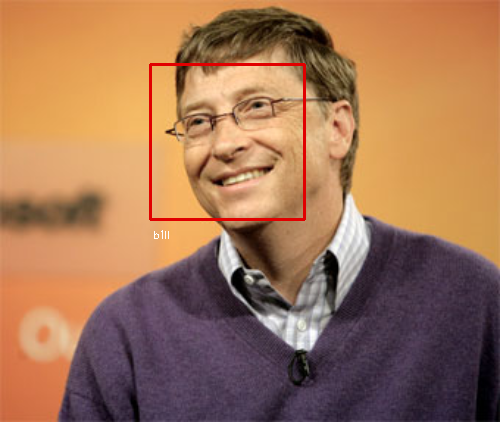

Processing 1.jpg
[0.84327934 0.78821994 0.38853681]


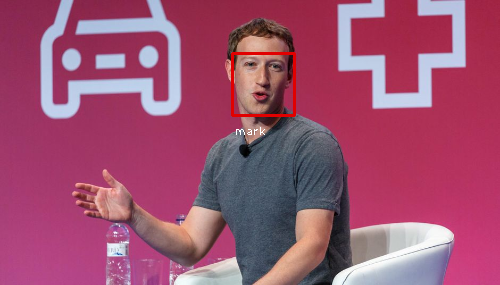

Processing 6.jpg
[0.86414348 0.37280678 0.78571353]


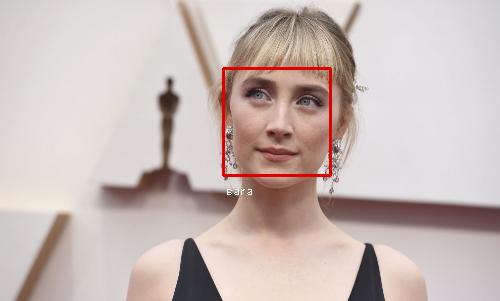

Processing 2.jpg
[0.90279683 0.40445733 0.79338884]


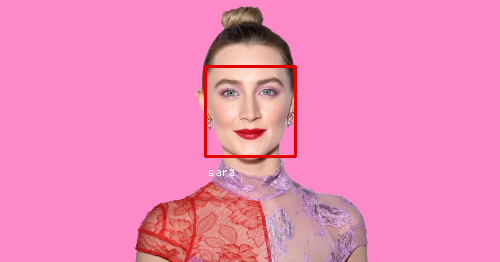

Processing 4.jpg
[0.72250406 0.96864481 0.88771915]


In [22]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow
def read_img(path):
  img = cv2.imread(path)
  (h, w) = img.shape[:2]
  width = 500
  ratio = width/float(w)
  height = int(h*ratio)
  return cv2.resize(img,(width, height))

known_encodings = []
known_names = []
known_dir = 'known'

for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])

  #known_encodings

unknown_dir = 'unknown'
for file in os.listdir(unknown_dir):
  print("Processing",file)
  img = read_img(unknown_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]

  results = face_recognition.compare_faces(known_encodings, img_enc)

  #face distances
  print(face_recognition.face_distance(known_encodings, img_enc))

  #for i in range(len(results)):
    #if results[i]:
     # print(known_names[i])

  #print(results)

  for i in range(len(results)):
    if results[i]:
      name = known_names[i]
      (top, right, bottom, left) = face_recognition.face_locations(img)[0]
      cv2.rectangle(img, (left, top), (right, bottom), (0,0,225), 2)
      cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 0.8, (255,255,255), 1)
      cv2_imshow(img)


